<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON6_MyFirstMachineLearningCodeforAssetPriceEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One of the simplest (if not the simplest) models that we can train with machine learning is the linear regression model. Linear regression imposes $g(.)$ to be a linear function of the inputs to predict the labels. A linear model makes a prediction by simply computing a sum of the input features, each multiplied by a parameter, plus a constant called the bias term (also "intercept"):
$$
\begin{align*}
\widehat{y} = g(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
\end{align*}
$$
where
* $\widehat{y}$ is the predicted value for the label.
* $n$ is the number of features.
* $x_j$ is the $j^{th}$ input feature.
* $\theta_k$ is the $k^{th}$ model parameter, including the bias term $\theta_0$.

Suppose that our training sample contains $m$ instances of labels and input features. Then, the instance $i$ is represented by a label $y^{(i)}$ and a row vector of features
$$
\begin{align*}
x^{(i)}= \left(x_0^{(i)}, x_1^{(i)}, x_2^{(i)}, \cdots , x_n^{(i)}\right)
\end{align*}
$$

where the input $x_0$ takes a value of one in all instances, in association with the bias term.

To train the model, we need a criterion to determine how the model fits the training data. The most common performance measure of a regression model is the mean squared error (MSE). Therefore, if we stack the model parameters in a $n\times 1$ column vector $\theta$, we need to find the values for each element of that vector that solves:
$$
\begin{align*}
\underset{\theta}\min \frac{1}{m}\sum_{i=1}^m \left(y^{(i)} - x^{(i)}\theta\right)^2
\end{align*}
$$

The solution to this problem, $\widehat{\theta}$, leads to a closed form expression, called the *Normal Equation*:

$$
\begin{align}
\widehat{\theta}=(X^TX)^{-1}X^Ty
\end{align}
$$

where $X^T$ is the transpose of the feature matrix $X$. The computations involved for such solution, particularly the inverse part, are extremely costly when we have information on a large number of features or too many instances to fit in the memory of the computer.

In machine learning applications, we usually opt for a generic optimization algorithm that is capable of finding optimal solutions to a wide range of problems: **Gradient Descent**. The idea behind this algorithm is to adjust gradually the parameters of the model in order to minimize a cost function, in our case the MSE. The method measures the local gradient of the cost function with respect to a parameter and tweaks the parameters in the direction of the descendent gradient. When the gradient is zero, we have reached a minimum.

An important element of gradient descent is the *learning rate* hyperparameter (more on hyperparameters later). The learning rate determines the size of the adjustment of the parameters after each evaluation of the gradient. A too low learning rate will lead to many iterations in the algorithm; a too high learning rate will lead to divergence in the algorithm.

One option to proceed is to fill $\theta$ with random values, *random initialization*, and then improve the cost function gradually until the algorithm converges to a minimum. Fortunately, the MSE cost function for a linear regression model happens to be a *convex function* that has one global minimum. Hence, Gradient Descent is guaranteed to approach arbitrarily close to the unique minimum, as long as the learning rate is not too high. Moreover, transforming the input features to have a similar scale among them will also help to increase the speed of convergence.

To implement gradient descent, we need to compute the gradient of the cost function with respect to each model parameter $\theta_k$, that is, the *partial derivative*. When we use the MSE as a cost function, the partial derivative is given by:
$$
\begin{align*}
\frac{\partial}{\partial\theta_j}MSE(\theta)=-\frac{2}{m}\sum_{i=1}^m \left(y^{(i)}-x^{(i)}\theta\right)x_j^{(i)}
\end{align*}
$$
Notice that the partial derivative with respect to $\theta_0$ *assumes* that $x_{0}^{(i)}=1$ for all $i$. If we stack all the partial derivatives in a column vector, we obtain the gradient $\nabla_{\theta} MSE(\theta)$, and each step in Gradient Descent leads to an update of the parameter vector given by:
$$
\begin{align*}
\theta^{[next\ step]}=\theta^{[previous\ step]} - \eta \nabla_{\theta} MSE\left(\theta^{[previous\ step]}\right)
\end{align*}
$$
where $\eta>0$ is the learning rate. We stop the algorithm when the gradient vector becomes tiny, below a tolerance $\epsilon$. To find a good learning rate, we can perform a grid search and eliminate models with a too slow convergence.

The Gradient Descent algorithm introduced above is called *Batch Gradient Descent*; it uses the whole batch of training data at every step to update the parameters. This method can be slow on very large training sets. To reduce the computational cost of each step we can opt for *Stochastic Gradient Descent*, which computes the gradient at each step based on a single instance picked at random, or for *Mini-Batch Gradient Descent*, which computes the gradients at each step based on random sets of instances (called mini-batches).

With all these concepts in mind, let's train our linear model and determine its ability predict future returns in the training sample. First, we load some libraries needed in this notebook. The Scikit-Learn library will be useful in all the applications of this module.


In [17]:
DAYS_FORWARD = 1
TEST_SIZE = 0.25

import numpy as np
import yfinance as yf

# Getting historical market data from SPY (ETF) (SPY)
df = yf.download("THYAO.IS", start="2010-01-01", end="2023-11-23")

[*********************100%%**********************]  1 of 1 completed


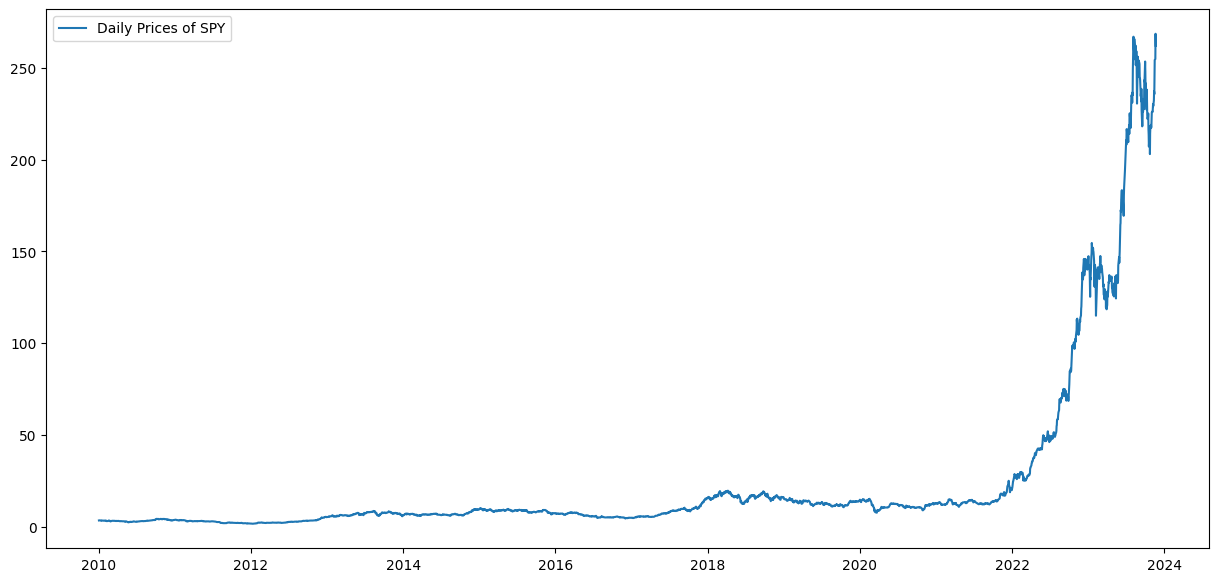

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(df.index, df["Adj Close"], label="Daily Prices of SPY")
plt.legend()
plt.show()

In [19]:
df["Ret"] = df["Adj Close"].pct_change()

name = "Ret"
df["Ret10_i"] = (
    df[name].rolling(10).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 10) - 1))
)
df["Ret25_i"] = (
    df[name].rolling(25).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 25) - 1))
)
df["Ret60_i"] = (
    df[name].rolling(60).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 60) - 1))
)
df["Ret120_i"] = (
    df[name].rolling(120).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 120) - 1))
)
df["Ret240_i"] = (
    df[name].rolling(240).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 240) - 1))
)

del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]
del df["Adj Close"]

df = df.dropna()
df.tail(10)

,Ret,Ret10_i,Ret25_i,Ret60_i,Ret120_i,Ret240_i
Date,,,,,,
2023-11-09,0.006999,0.722984,-0.191500,-0.167114,0.460734,0.298777
2023-11-10,-0.004778,0.534826,-0.159039,-0.224028,0.438615,0.300132
2023-11-13,0.013531,0.591584,0.087111,-0.132323,0.456689,0.297590
2023-11-14,0.021103,0.875844,-0.016834,-0.147135,0.484200,0.301571
2023-11-15,-0.006326,0.774804,0.094530,-0.131140,0.470729,0.285345
2023-11-16,0.036927,0.916426,0.327945,0.031686,0.451399,0.296650
2023-11-17,0.040729,1.198236,0.540416,0.163579,0.463330,0.298284
2023-11-20,0.001967,1.195724,0.533864,0.113418,0.459260,0.286205
2023-11-21,0.053974,1.738091,0.707717,0.079487,0.521712,0.275904


In [20]:
df["Ret25"] = df["Ret25_i"].shift(-DAYS_FORWARD)
df = df.dropna()
df.tail(10)

<ipython-input-20-225a2afff360>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Ret25"] = df["Ret25_i"].shift(-DAYS_FORWARD)


,Ret,Ret10_i,Ret25_i,Ret60_i,Ret120_i,Ret240_i,Ret25
Date,,,,,,,
2023-11-08,0.011504,1.194759,-0.169438,-0.212363,0.426962,0.300719,-0.191500
2023-11-09,0.006999,0.722984,-0.191500,-0.167114,0.460734,0.298777,-0.159039
2023-11-10,-0.004778,0.534826,-0.159039,-0.224028,0.438615,0.300132,0.087111
2023-11-13,0.013531,0.591584,0.087111,-0.132323,0.456689,0.297590,-0.016834
2023-11-14,0.021103,0.875844,-0.016834,-0.147135,0.484200,0.301571,0.094530
2023-11-15,-0.006326,0.774804,0.094530,-0.131140,0.470729,0.285345,0.327945
2023-11-16,0.036927,0.916426,0.327945,0.031686,0.451399,0.296650,0.540416
2023-11-17,0.040729,1.198236,0.540416,0.163579,0.463330,0.298284,0.533864
2023-11-20,0.001967,1.195724,0.533864,0.113418,0.459260,0.286205,0.707717


In [21]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
Xdf, ydf = df.iloc[:, 0:-1], df.iloc[:, -1]
X = Xdf.astype("float32")
y = ydf.astype("float32")
print(X.shape, y.shape)

(3331, 6) (3331,)


In [23]:
reg = linear_model.LinearRegression().fit(X, y)

In [24]:
reg.coef_

array([-0.17489062,  0.03104758,  0.9349917 , -0.00471953,  0.00205089,
        0.02217805], dtype=float32)

In [25]:
reg.intercept_

0.0024144575

In [26]:
reg.score(X, y)  # R-squared

0.9368831056485254

In [27]:
# Make predictions
y_pred = reg.predict(X)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print(
    "Coefficient of determination (R2): %.5f" % r2_score(y, y_pred)
)  # Another way to compute the R-squared

Coefficients: 
 [-0.17489062  0.03104758  0.9349917  -0.00471953  0.00205089  0.02217805]
Mean squared error: 0.01876
Coefficient of determination (R2): 0.93688


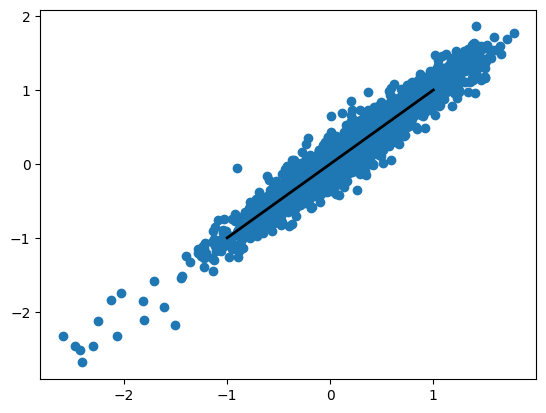

In [28]:
# Plot outputs
plt.scatter(y_pred, y)
plt.plot([-1, 1], [-1, 1], color="black", linewidth=2)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * TEST_SIZE), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 6) (832, 6) (2499,) (832,)


In [32]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

In [33]:
# Make predictions in the training sample
y_pred = reg.predict(X_train)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.5f" % r2_score(y_train, y_pred))

Coefficients: 
 [-0.25574613  0.04311109  0.9254981  -0.0095997   0.01774473  0.00391004]
Mean squared error: 0.01624
Coefficient of determination (R2): 0.93607


In [35]:
# Make predictions in the test sample
y_pred_test = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print(
    "Mean squared error (out-of-sample): %.5f" % mean_squared_error(y_test, y_pred_test)
)
# The coefficient of determination: 1 is perfect prediction
print(
    "Coefficient of determination (R2 out-of-sample): %.5f"
    % r2_score(y_test, y_pred_test)
)

Coefficients: 
 [-0.25574613  0.04311109  0.9254981  -0.0095997   0.01774473  0.00391004]
Mean squared error (out-of-sample): 0.02658
Coefficient of determination (R2 out-of-sample): 0.92494


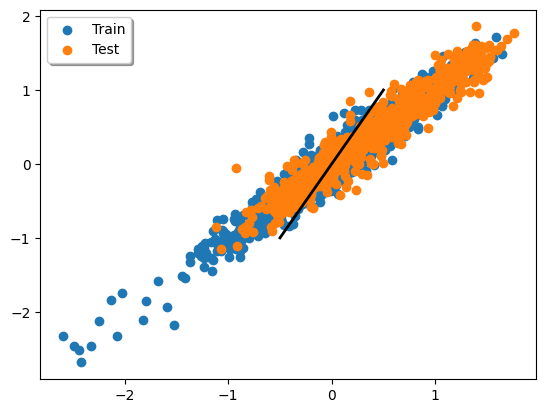

In [36]:
# Plot outputs
plt.scatter(y_pred, y_train, label="Train")
plt.scatter(y_pred_test, y_test, label="Test")
plt.plot([-0.5, 0.5], [-1, 1], color="black", linewidth=2)
legend = plt.legend(loc="upper left", shadow=True)
plt.show()

(1666, 24) (1665, 24) (1666,) (1665,)
Coefficients: 
 [-1.1409168e-01  3.8500011e-02  9.2009753e-01 -2.5929771e-02
  6.3219376e-02 -2.2181429e-02 -4.5821428e+00  1.5675101e-02
  1.1919019e-02  1.5364613e-01 -8.2128555e-02 -2.8674897e-02
  1.2882608e+01 -2.7733222e-03  5.0130393e-03  9.8924555e-02
 -2.8147024e-01  1.1606647e-01  6.7398792e+02 -2.6951730e-03
 -1.0137907e-02 -3.9025536e-01  8.0231446e-01 -1.0795093e-01]
Mean squared error: 0.01396
Coefficient of determination (R2): 0.92961
Coefficients: 
 [-1.1409168e-01  3.8500011e-02  9.2009753e-01 -2.5929771e-02
  6.3219376e-02 -2.2181429e-02 -4.5821428e+00  1.5675101e-02
  1.1919019e-02  1.5364613e-01 -8.2128555e-02 -2.8674897e-02
  1.2882608e+01 -2.7733222e-03  5.0130393e-03  9.8924555e-02
 -2.8147024e-01  1.1606647e-01  6.7398792e+02 -2.6951730e-03
 -1.0137907e-02 -3.9025536e-01  8.0231446e-01 -1.0795093e-01]
Mean squared error (out-of-sample): 0.03053
Coefficient of determination (R2 out-of-sample): 0.91885


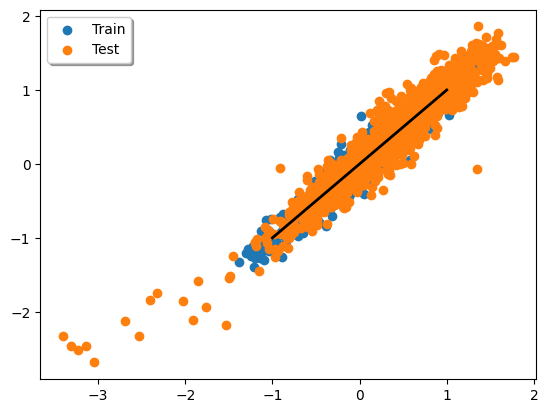

In [37]:
# Polynomial regression
Xpoly = X
for pp in range(2, 5):
    Xpoly = np.concatenate((Xpoly, np.power(X, pp)), axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    Xpoly, y, test_size=int(len(y) * 0.5), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

reg = linear_model.LinearRegression().fit(X_train, y_train)

# Make predictions in the training sample
y_pred = reg.predict(X_train)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.5f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.5f" % r2_score(y_train, y_pred))

# Make predictions in the test sample
y_pred_test = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print(
    "Mean squared error (out-of-sample): %.5f" % mean_squared_error(y_test, y_pred_test)
)
# The coefficient of determination: 1 is perfect prediction
print(
    "Coefficient of determination (R2 out-of-sample): %.5f"
    % r2_score(y_test, y_pred_test)
)

# Plot outputs
plt.scatter(y_pred, y_train, label="Train")
plt.scatter(y_pred_test, y_test, label="Test")
plt.plot([-1, 1], [-1, 1], color="black", linewidth=2)
legend = plt.legend(loc="upper left", shadow=True)
plt.show()